## Example Code for Interval K-means

In [13]:
from interClusLib.IntervalData import IntervalData
from interClusLib.preprocessing import min_max_normalize
from interClusLib.clustering.IntervalKMeans import IntervalKMeans
from interClusLib.visualization import Interval3d, IntervalParallelCoordinates
from interClusLib.evaluation import *
from interClusLib.cluster_number_analysis import *

In [8]:
clustered_data = IntervalData.make_interval_blobs(n_clusters=3, n_dims=3, n_samples= 200)

clustered_data.summary()

Data Summary:
       Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
count       200.000000       200.000000       200.000000       200.000000   
mean         -8.985404        -6.415955        -6.593003        -3.809377   
std           2.060835         1.512189         1.765440         2.557101   
min         -13.886546       -10.096903       -10.677950        -9.740520   
25%         -10.569274        -7.578648        -7.824304        -6.297621   
50%          -9.131482        -6.459529        -6.538335        -3.148312   
75%          -7.232456        -5.373859        -5.160088        -1.812377   
max          -4.057317        -2.109581        -2.679248         0.662804   

       Feature_3_lower  Feature_3_upper  
count       200.000000       200.000000  
mean        -10.018548        -6.873943  
std           1.918771         1.559667  
min         -14.306908       -10.703965  
25%         -11.477497        -8.047601  
50%         -10.173623        -7.020133 

In [9]:
data = clustered_data.get_intervals()

data = min_max_normalize(data)

In [ ]:
kmeans = IntervalKMeans(n_clusters=3, max_iter=1000, distance_func='euclidean', random_state=42)

kmeans.fit(data)

In [11]:
print(kmeans.centroids_)
print(kmeans.get_labels())

[[[0.38406967 0.63601665]
  [0.2010212  0.32817992]
  [0.31908129 0.61484945]]

 [[0.25522694 0.53498319]
  [0.40593951 0.75509113]
  [0.54376616 0.76423763]]

 [[0.60821398 0.73043637]
  [0.48156972 0.74856762]
  [0.23487316 0.51806954]]]
[1 0 1 0 1 1 2 2 2 0 0 0 2 1 2 1 1 2 2 2 0 2 1 1 0 0 2 0 1 1 0 1 2 0 1 2 2
 0 1 0 2 0 1 0 2 1 0 1 1 2 1 2 1 1 1 2 0 1 1 1 0 0 1 0 1 2 0 0 2 1 2 1 2 1
 0 0 2 0 2 0 0 0 1 0 1 1 0 2 0 1 1 2 0 1 1 1 0 0 0 2 2 2 1 1 2 1 2 2 1 2 2
 0 2 2 2 2 1 2 2 0 0 0 0 2 2 2 2 1 2 2 0 1 1 0 2 0 1 2 1 2 0 2 1 2 2 0 1 1
 0 0 2 0 1 0 2 2 1 2 2 1 1 0 2 0 1 0 1 1 2 2 0 2 0 0 2 0 2 0 0 1 0 0 0 2 1
 0 1 0 2 0 0 1 0 1 1 0 0 2 0 1]


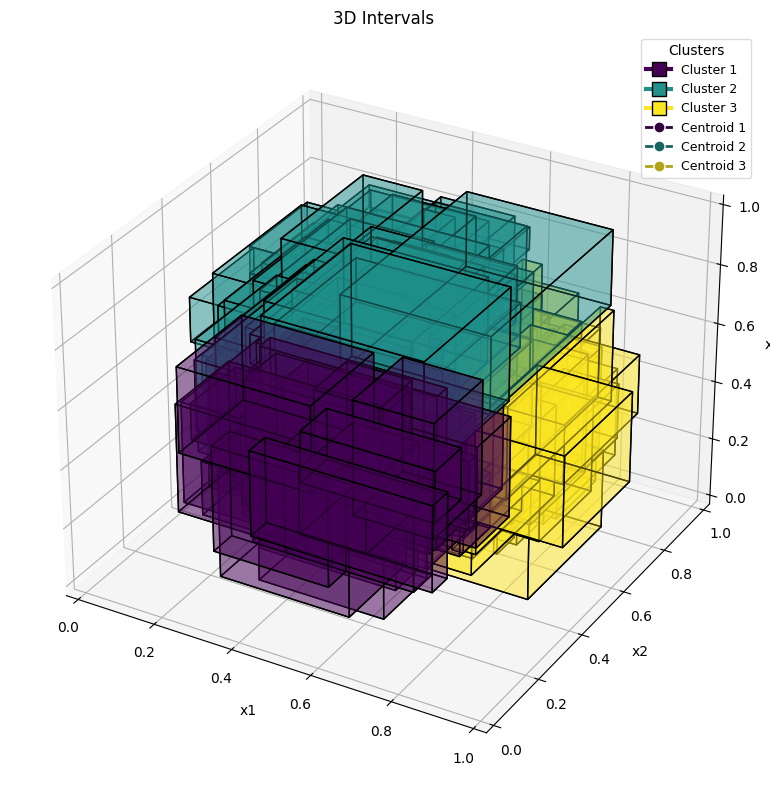

In [15]:
fig, ax = Interval3d.visualize(intervals=data, labels=kmeans.labels_, centroids=kmeans.centroids_, margin=0.01)

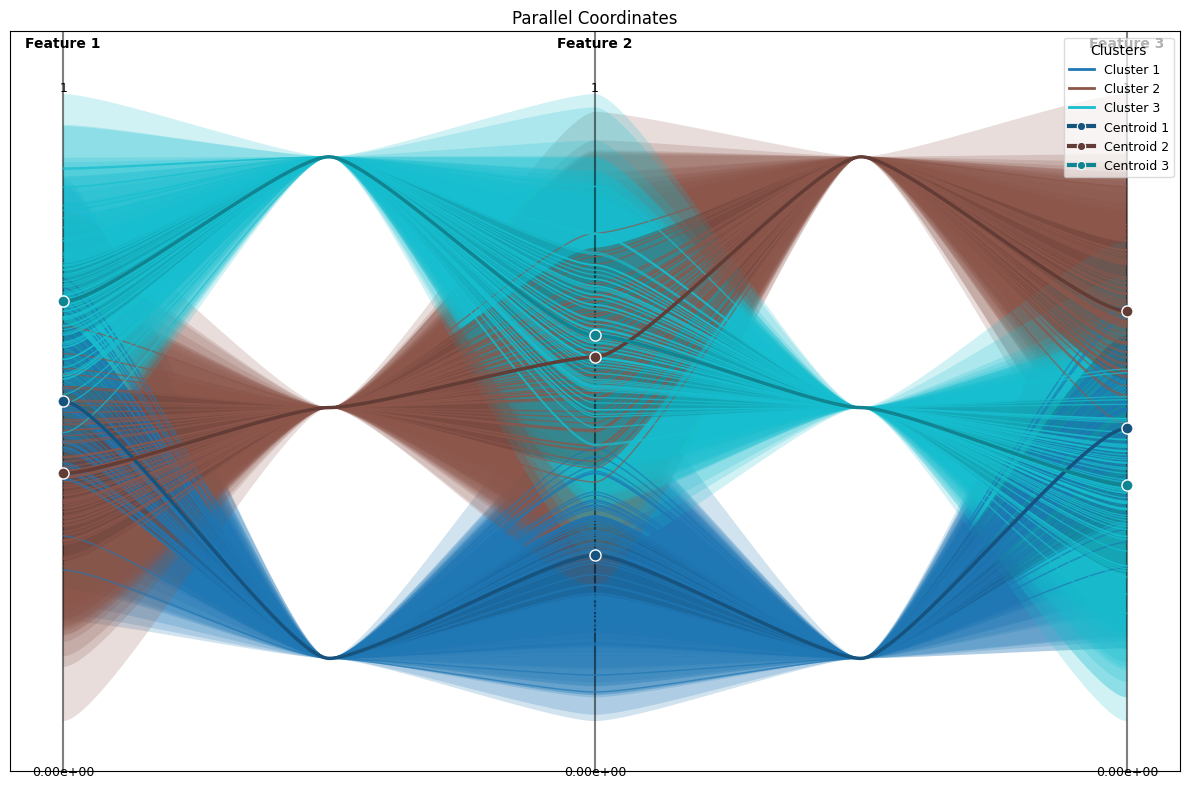

In [16]:
fig, ax = IntervalParallelCoordinates.visualize(intervals=data, labels=kmeans.labels_, centroids=kmeans.centroids_, beta= 1)

In [18]:
metric_results = kmeans.compute_metrics_for_k_range(
    data,
    min_clusters=2,
    max_clusters=10,
    metrics=['distortion', 'silhouette', 'davies_bouldin','calinski_harabasz','dunn'],
)

print(metric_results)

{'distortion': {2: 0.10944499676940236, 3: 0.05665993419540886, 4: 0.052375385905329586, 5: 0.04819346554716412, 6: 0.04559159307375331, 7: 0.041313999283206816, 8: 0.03829714212142748, 9: 0.03663782070040431, 10: 0.034058996512037525}, 'silhouette': {2: 0.31954569695040225, 3: 0.44724250823212247, 4: 0.336973077474851, 5: 0.262124587070756, 6: 0.2521129345431838, 7: 0.18979735188660413, 8: 0.18713006704592053, 9: 0.18252265797586376, 10: 0.19330927692419655}, 'davies_bouldin': {2: 1.2090300745927176, 3: 0.7973305742029719, 4: 1.321660075932478, 5: 1.586591313740363, 6: 1.5339776626328303, 7: 1.6541037366692777, 8: 1.560439336237721, 9: 1.5314413218259753, 10: 1.4248700825245955}, 'calinski_harabasz': {2: 101.3730424462605, 3: 189.17596473575293, 4: 141.08629618094818, 5: 118.64014146449811, 6: 102.02844093718755, 7: 96.67378376937776, 8: 91.08831558955563, 9: 83.95935892513297, 10: 81.4594324250281}, 'dunn': {2: 0.057059785380303166, 3: 0.20932972132710623, 4: 0.16663382024912884, 5: 

L Method optimal k: 3
Elbow Method optimal k: 3


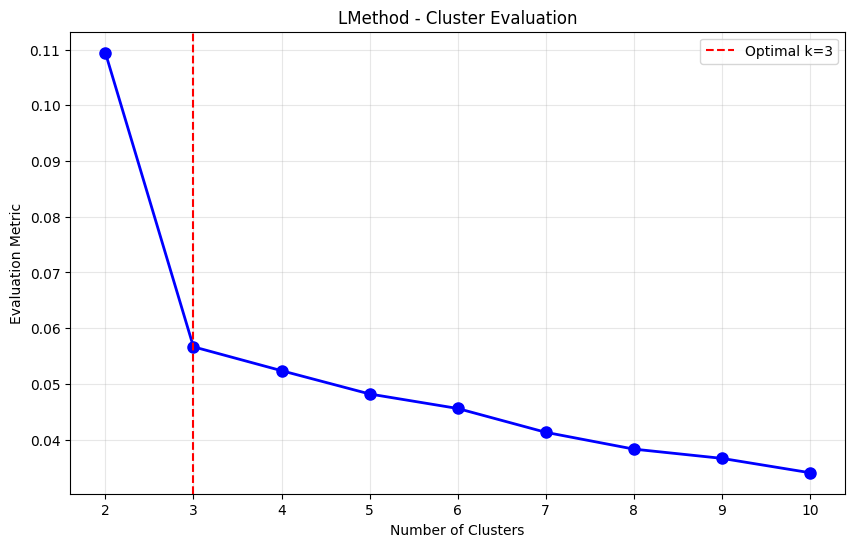

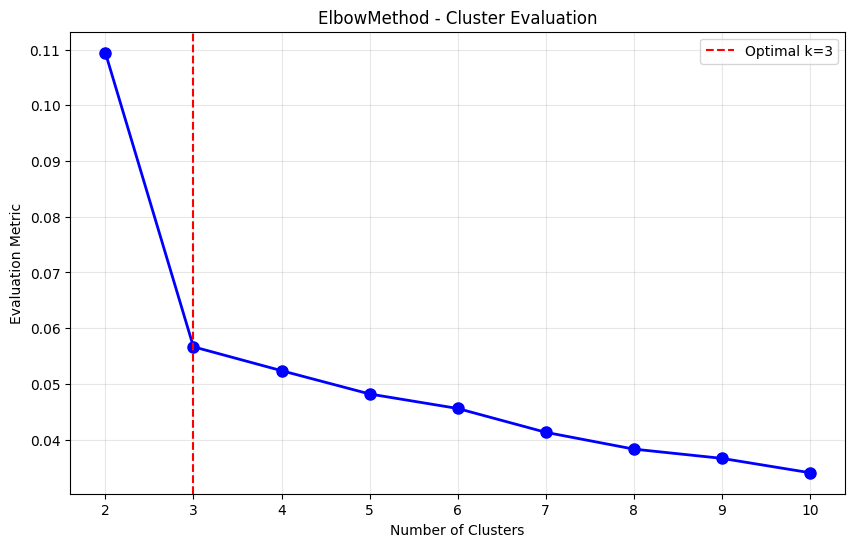

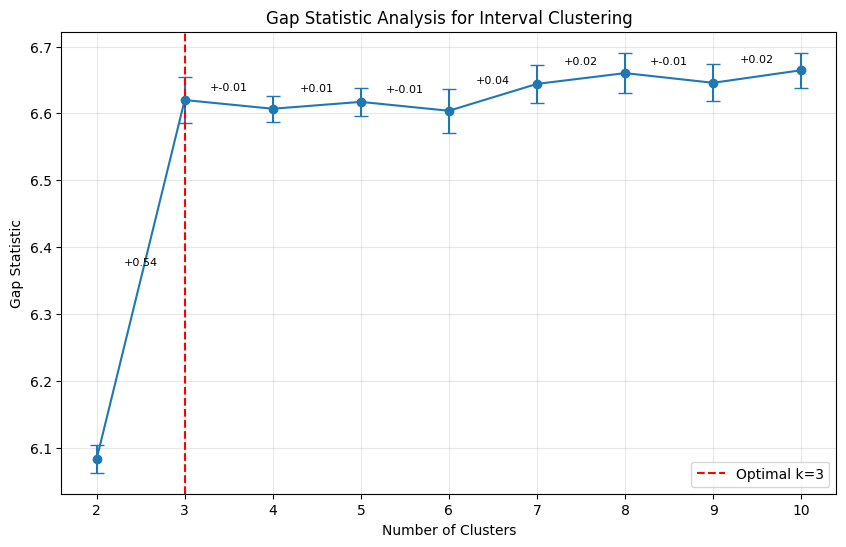

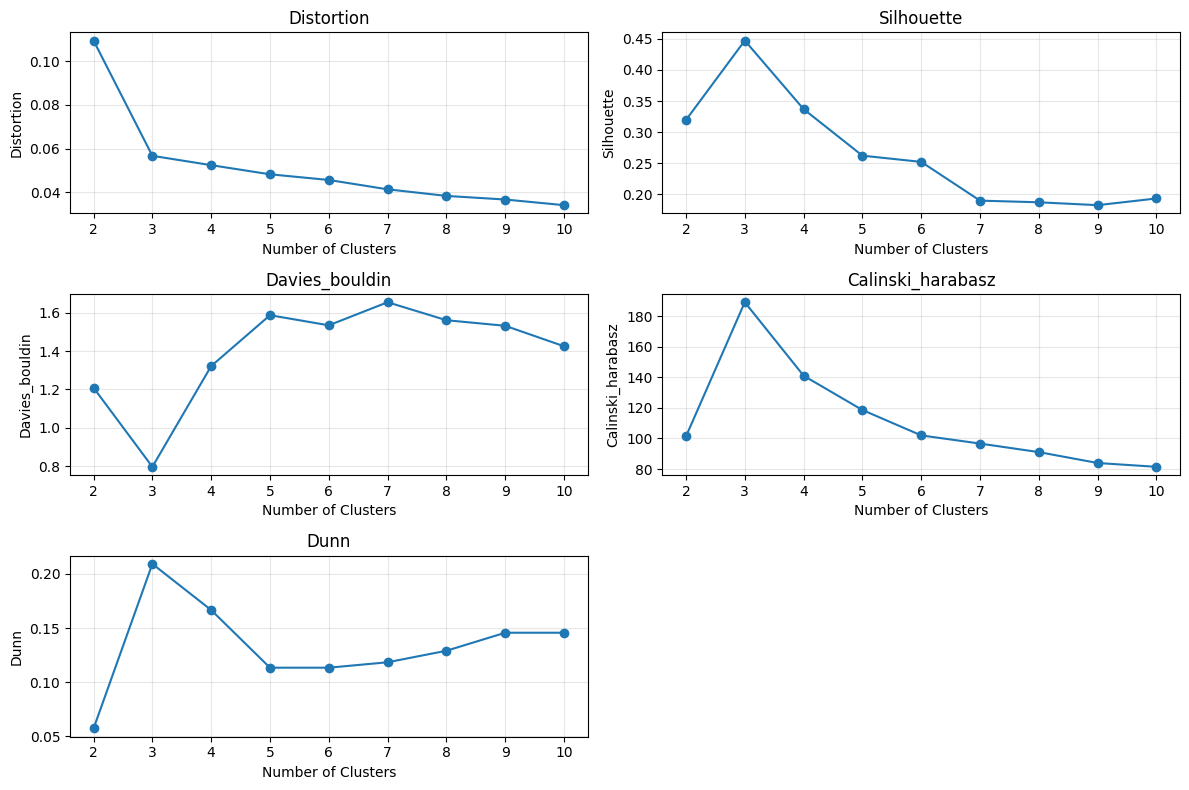

In [24]:
# 使用L方法确定最佳聚类数
l_method = LMethod(min_clusters=2, max_clusters=10)
optimal_k_l = l_method.evaluate(metric_results['distortion'])
plt = l_method.plot()
print(f"L Method optimal k: {optimal_k_l}")

# 使用肘部法则确定最佳聚类数
elbow = ElbowMethod(min_clusters=2, max_clusters=10, second_derivative= True)
optimal_k_elbow = elbow.evaluate(metric_results['distortion'])
print(f"Elbow Method optimal k: {optimal_k_elbow}")
plt = elbow.plot()

def cluster(intervals, k):
    return kmeans.cluster_and_return(intervals, k)

# 初始化 GapStatistic
gap_evaluator = GapStatistic(min_clusters=2, max_clusters=15, n_refs=10)

# 使用 GapStatistic 确定最佳聚类数
optimal_k = gap_evaluator.evaluate(
    eval_data=metric_results['distortion'],
    raw_data=data,
    cluster_func=cluster
)

# 可视化结果
gap_evaluator.plot_gap()
plt.title("Gap Statistic Analysis for Interval Clustering")
plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, (metric_name, values) in enumerate(metric_results.items(), 1):
    plt.subplot(3, 2, i)
    x = list(values.keys())
    y = list(values.values())
    plt.plot(x, y, 'o-')
    plt.title(f"{metric_name.capitalize()}")
    plt.xlabel("Number of Clusters")
    plt.ylabel(metric_name.capitalize())
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()